AMAZON SALES DATA BASE

Here we are going to make an EDA and clean data, preparing to send it to sql after

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 1000)         # Wider display for DataFrames
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.max_rows', 20)        # Show up to 20 rows



In [2]:
import pandas as pd

# Read a CSV file
amazon = pd.read_csv("amazon.csv")

# Display the first few rows
print(amazon.head())

   product_id                                                                                                                                                                                             product_name                                                                           category discounted_price actual_price discount_percentage rating rating_count  \
0  B07JW9H4J1                                       Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables             ₹399       ₹1,099                 64%    4.2       24,269   
1  B098NS6PVG        Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)  Computers&Accessories|Accessories&Peripher

In [3]:
#Display the column names
print(amazon.columns)
#look for missing values
print(amazon.isna().sum())


Index(['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'], dtype='object')
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [4]:
# Display rows with missing values
print(amazon[amazon.isna().any(axis=1)])


     product_id                                                                                                                                                                                   product_name                                                                           category discounted_price actual_price discount_percentage rating rating_count  \
282  B0B94JPY2N                                                             Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables             ₹199         ₹999                 80%    3.0          NaN   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|C

Since the missing data is MAR(Missing at Random) and it will not affect hard on the analysis we are dropping the rows

In [5]:
#droping the rows with missing values
amazon = amazon.dropna()
print(amazon.isna().sum())


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Now that we dont have anny missing values, we are going to look for the types of infromation we have 

In [ ]:
# Display the data types of each column
print(amazon.dtypes)

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [7]:
# converting the data that is not in the correct format
amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon['actual_price'] = amazon['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%', '').astype(float)

In [15]:
# Display the data types of each column
print(amazon.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [9]:
# Clean 'rating_count' column: remove commas, ' ratings', and replace problematic values with NaN
amazon['rating_count'] = amazon['rating_count'].str.replace(',', '').str.replace(' ratings', '')
amazon['rating_count'] = amazon['rating_count'].replace(['|', '', None], np.nan)
amazon['rating_count'] = pd.to_numeric(amazon['rating_count'], errors='coerce')

# Replace 'No rating' with np.nan in the entire column before converting
amazon['rating'] = amazon['rating'].replace('No rating', np.nan)
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

print(amazon.dtypes)
print(amazon.iloc[1277])

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count             int64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object
product_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [10]:
#saving the cleaned data to a new CSV file
amazon.to_csv("amazon_cleaned.csv", index=False)

Data es already clean, the columns that represent numeric information are already transformed

Next we are making a EDA

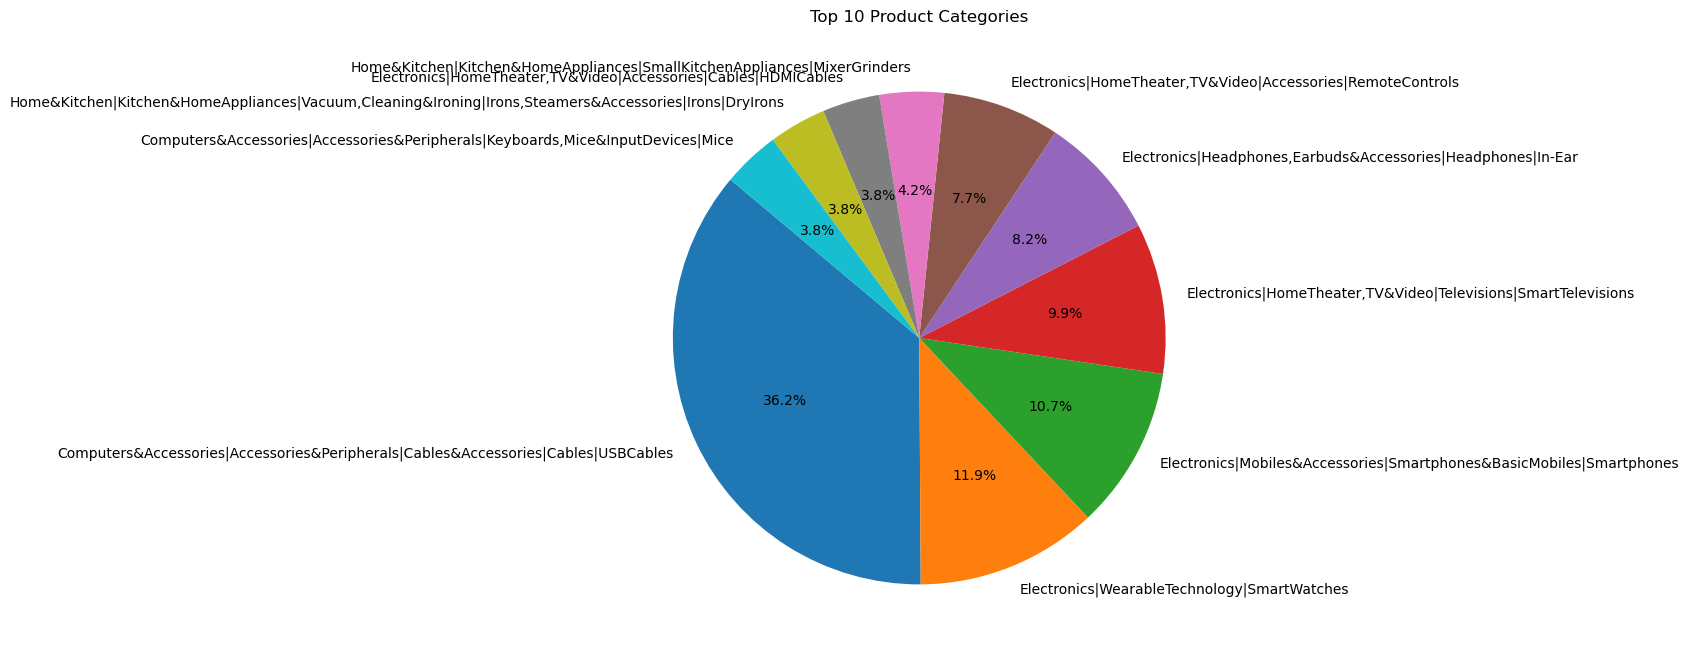

In [11]:
# Get the top 10 categories by count
top10_categories = amazon['category'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top10_categories, labels=top10_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories')
plt.show()

In [12]:
print(amazon.describe())

       discounted_price   actual_price  discount_percentage       rating   rating_count
count       1463.000000    1463.000000          1463.000000  1462.000000    1463.000000
mean        3129.277122    5451.068544            47.650718     4.096717   18295.541353
std         6948.222850   10881.018448            21.622373     0.289497   42753.864952
min           39.000000      39.000000             0.000000     2.000000       2.000000
25%          325.000000     800.000000            32.000000     4.000000    1186.000000
50%          799.000000    1690.000000            50.000000     4.100000    5179.000000
75%         1999.000000    4312.500000            63.000000     4.300000   17336.500000
max        77990.000000  139900.000000            94.000000     5.000000  426973.000000


In [13]:
# Function to get the top 5 products by category
def top5_products_by_category(top10_category):
    """
    Returns the top 5 products in a given category based on rating.
    """
    products = []
    for category in top10_category:
        top5_temp = amazon[amazon['category'] == category].sort_values(by='rating', ascending=False).head(5)
        products.append(top5_temp)
    return pd.concat(products)

top_5_products_category = top5_products_by_category(top10_categories.index)
#obtaining only the required columns
top5_products_category = top_5_products_category[['category', 'product_name', 'rating']]
print(top5_products_category)

                                                                              category                                                                                                                                                                                                                                        product_name  rating
174  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                                                     Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)     5.0
212  Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                                                                                                        AmazonBasics USB 2.0 Extension Cable for Personal Computer, Printer, 2-Pack - A-Male to A-Female - 3.3 Feet (1 Meter

In [14]:
#saving the top 10 categories to a CSV file
top10_categories = top10_categories.reset_index()
top10_categories.to_csv("top10_categories.csv", index=False)